<a href="https://www.kaggle.com/code/pranaysable/nvidia-stock-price-dataset-1999-2025-eda?scriptVersionId=297887116" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nvidia-stocks-data-2025/NVDA.csv


**NVIDIA Stock Price Dataset (1999 - 2025)**

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns 

# Exploratory Data Analysis

To read csv file

In [3]:
df = pd.read_csv("/kaggle/input/nvidia-stocks-data-2025/NVDA.csv")

In [4]:
df.shape


(6558, 7)


**rows=6558columns=7**


In [5]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000
1,1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000
2,1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000
3,1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000
4,1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000


**df.head() shows the first 5 columns by default just to make sure the data is right**

In [6]:
df.dtypes

Date          object
Adj Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume         int64
dtype: object

**to know what data type does the data belongs to**

In [7]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6.558000e+03
mean,8.768532,8.795447,8.956567,8.618315,8.795850,5.991103e+08
std,23.907205,23.904882,24.349618,23.419200,23.922708,4.307236e+08
min,0.031286,0.034115,0.035547,0.033333,0.034896,1.968000e+07
25%,0.257739,0.281042,0.288511,0.273354,0.280810,3.384780e+08
50%,0.437176,0.466083,0.472875,0.459250,0.466584,5.002635e+08
75%,4.597059,4.644625,4.724000,4.588750,4.632437,7.307002e+08
max,149.429993,149.429993,153.130005,147.820007,153.029999,9.230856e+09


In [8]:
df.isnull().sum()


Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

**there is no null value in this data cause basically it is a stock data and here you wont find much if a null data its all numbers**

In [9]:
df['Date'] = pd.to_datetime(df['Date'])


In [10]:
df.dtypes
 

Date         datetime64[ns]
Adj Close           float64
Close               float64
High                float64
Low                 float64
Open                float64
Volume                int64
dtype: object

**did this bcz the data type of date was object i just relaized it later its better to keep it in date time so that for better plotting**

In [11]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000
1,1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000
2,1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000
3,1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000
4,1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000


# Long-Term Price Trend

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


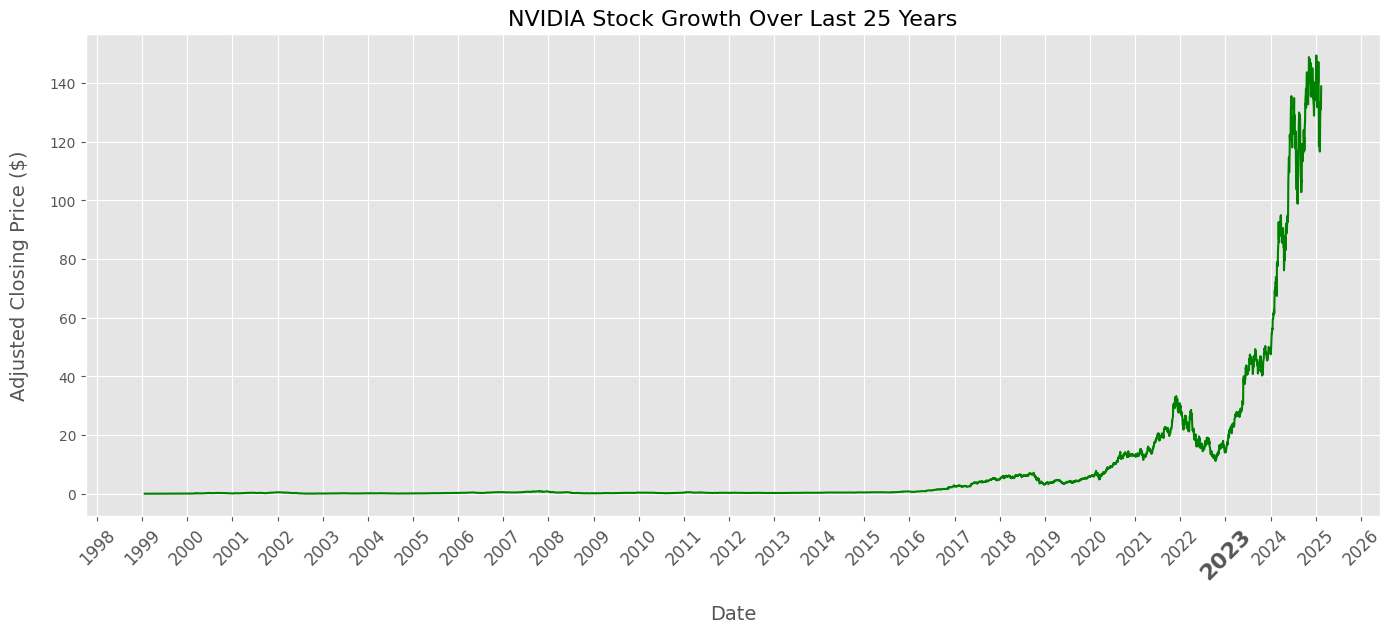

In [12]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Adj Close', data=df, color='green')
plt.title('NVIDIA Stock Growth Over Last 25 Years', fontsize=16)
plt.xlabel('Date', fontsize=14, labelpad=15)        
plt.ylabel('Adjusted Closing Price ($)', fontsize=14, labelpad=15) 
plt.grid(True)
plt.tight_layout()


import matplotlib.dates as mdates
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, fontsize=12)

for label in ax.get_xticklabels():
    if label.get_text() == '2023':
        label.set_fontsize(16)
        label.set_fontweight('bold')

plt.show()

   

**A long-term price trend chart shows NVIDIA’s strong growth over 25 years, with a sharp stock rise in 2023. This surge was driven by booming demand for its GPUs due to rapid growth in AI and generative AI like ChatGPT, strong data center business growth, continued leadership in gaming GPUs, record financial results, and strategic expansions into new markets such as autonomous vehicles and edge computing.**

# Historical Trading Volume Trend

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


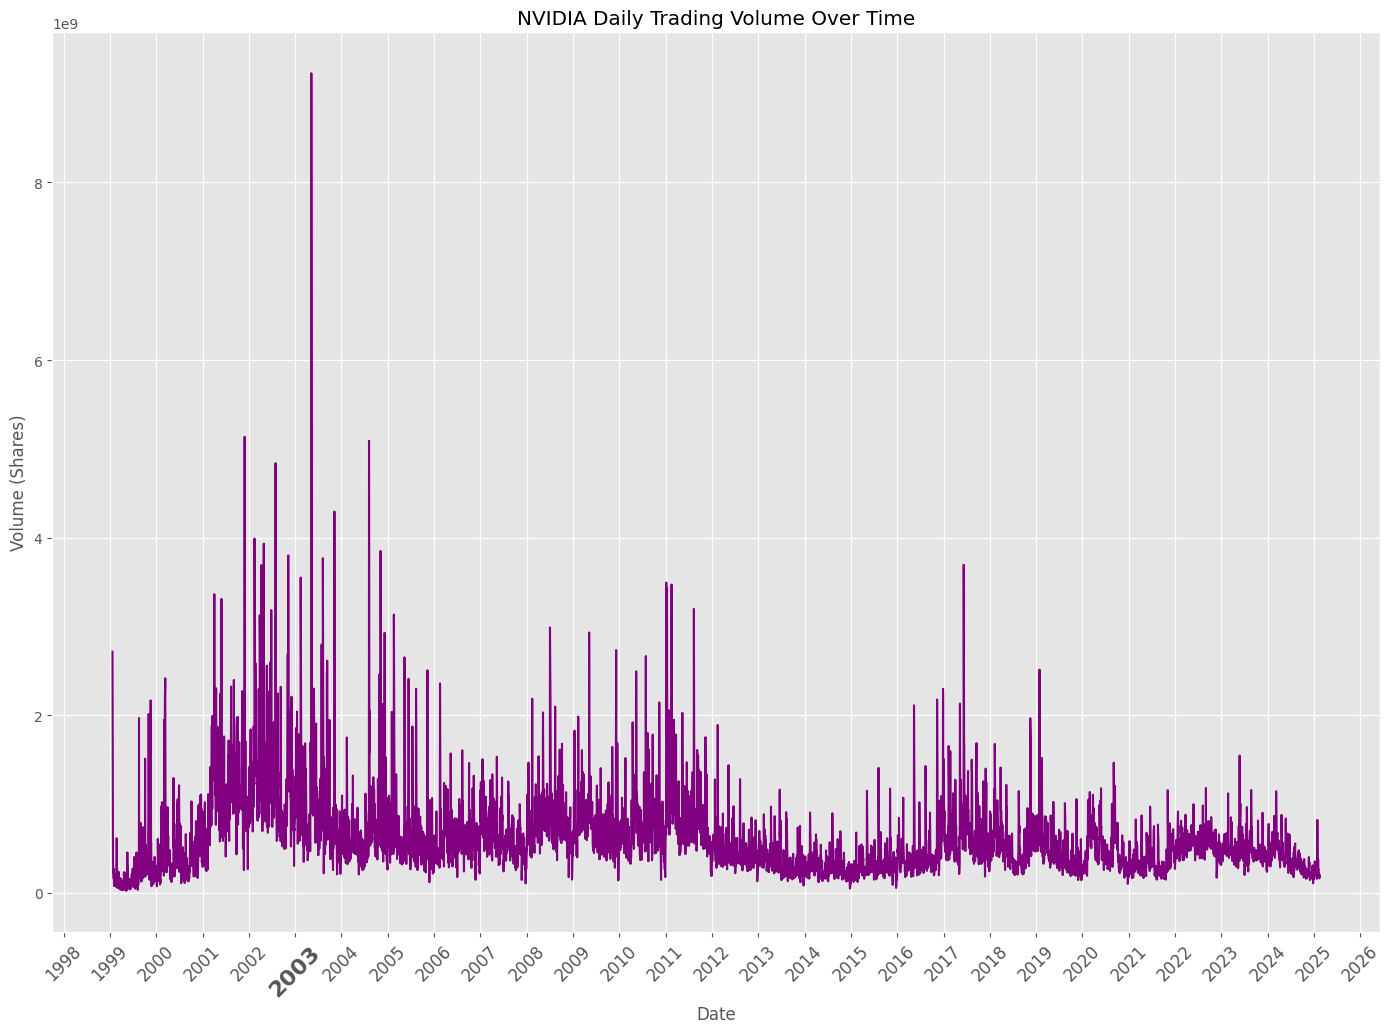

In [13]:
import matplotlib.dates as mdates

plt.figure(figsize=(14, 10))
sns.lineplot(x='Date', y='Volume', data=df, color='purple')
plt.title('NVIDIA Daily Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (Shares)')
plt.grid(True)
plt.tight_layout()

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, fontsize=12)

for label in ax.get_xticklabels():
    if label.get_text() == '2003':
        label.set_fontsize(16)
        label.set_fontweight('bold')

plt.show()


**The sudden spike in NVIDIA’s trading volume around 2003 was likely due to major company developments, such as the launch of new products or technologies that attracted investor attention. Specifically, in 2003, NVIDIA introduced significant advancements in graphics technology and secured key partnerships, which boosted market interest and trading activity. This surge in volume reflects increased buying and selling as investors reacted to the company’s growth potential at that time.**


In [14]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000
1,1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000
2,1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000
3,1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000
4,1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000


# Moving Average

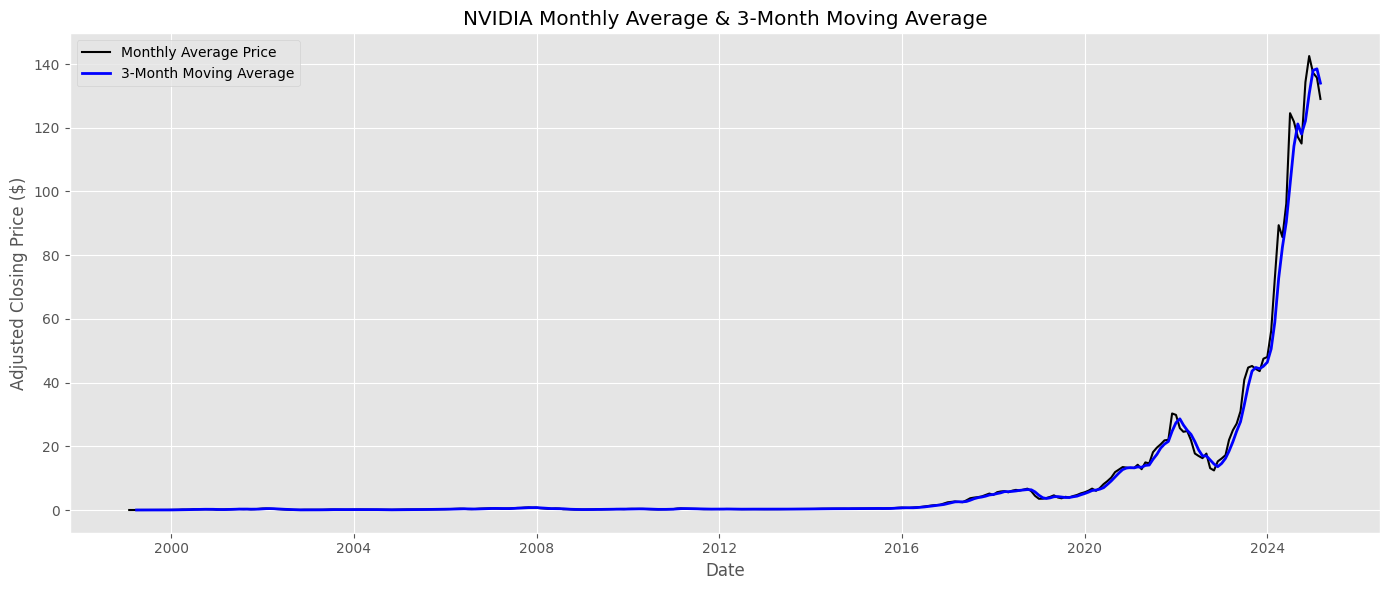

In [15]:

df.set_index('Date', inplace=True)

# Resample to monthly frequency using 'ME' (Month-End) and compute average
monthly_avg = df['Adj Close'].resample('ME').mean()

# Calculate 3-month moving average
monthly_ma = monthly_avg.rolling(window=3).mean()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(monthly_avg, label='Monthly Average Price', color='black')
plt.plot(monthly_ma, label='3-Month Moving Average', color='blue', linewidth=2)
plt.title('NVIDIA Monthly Average & 3-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Heat Map

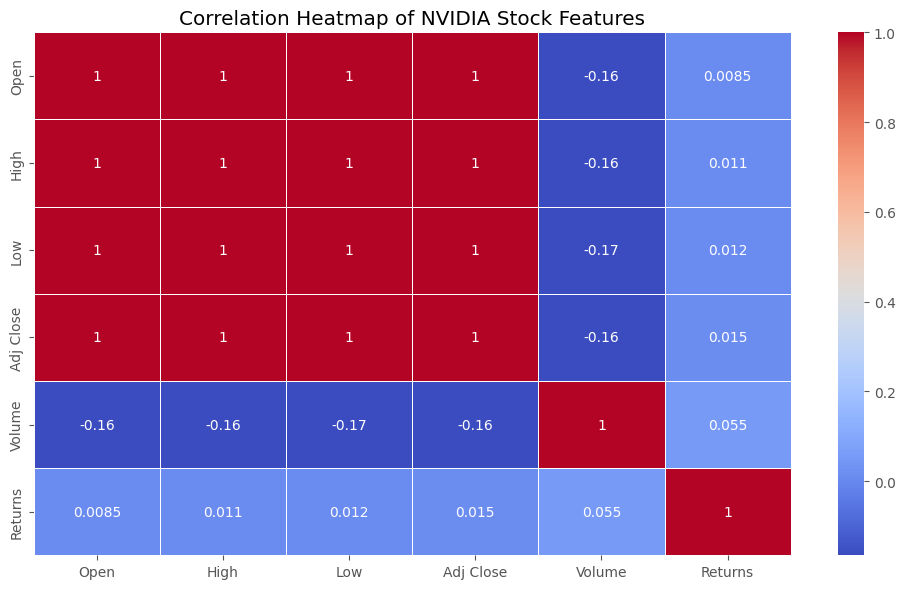

In [16]:

# Optional: Add returns for deeper insight
df['Returns'] = df['Adj Close'].pct_change()

# Compute correlation
correlation = df[['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Returns']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of NVIDIA Stock Features')
plt.tight_layout()
plt.show()


**The correlation heatmap reveals a perfect positive correlation among NVIDIA’s price-related features—Open, High, Low, and Adjusted Close—indicating they move closely together. In contrast, trading volume shows a weak negative correlation with price features, suggesting that higher volume does not directly drive price increases. Returns exhibit minimal correlation with both prices and volume, highlighting their independent behavior and the need for more advanced analysis to understand return drivers.**

# Volume vs Returns

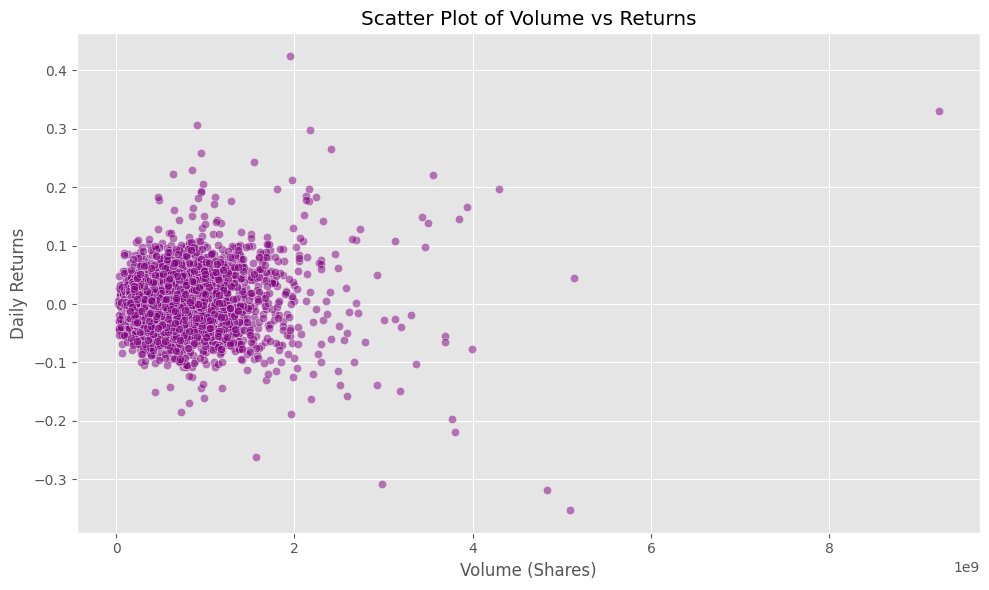

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate daily returns if not already done
df['Returns'] = df['Adj Close'].pct_change()

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume', y='Returns', data=df, alpha=0.5, color='purple')
plt.title('Scatter Plot of Volume vs Returns')
plt.xlabel('Volume (Shares)')
plt.ylabel('Daily Returns')
plt.grid(True)
plt.tight_layout()
plt.show()


**This scatter plot shows that NVIDIA's daily trading volume has little to no correlation with daily returns. Most points cluster around low volume and near-zero returns, confirming that higher trading activity doesn’t consistently impact price movement.**

# Rolling Volatility

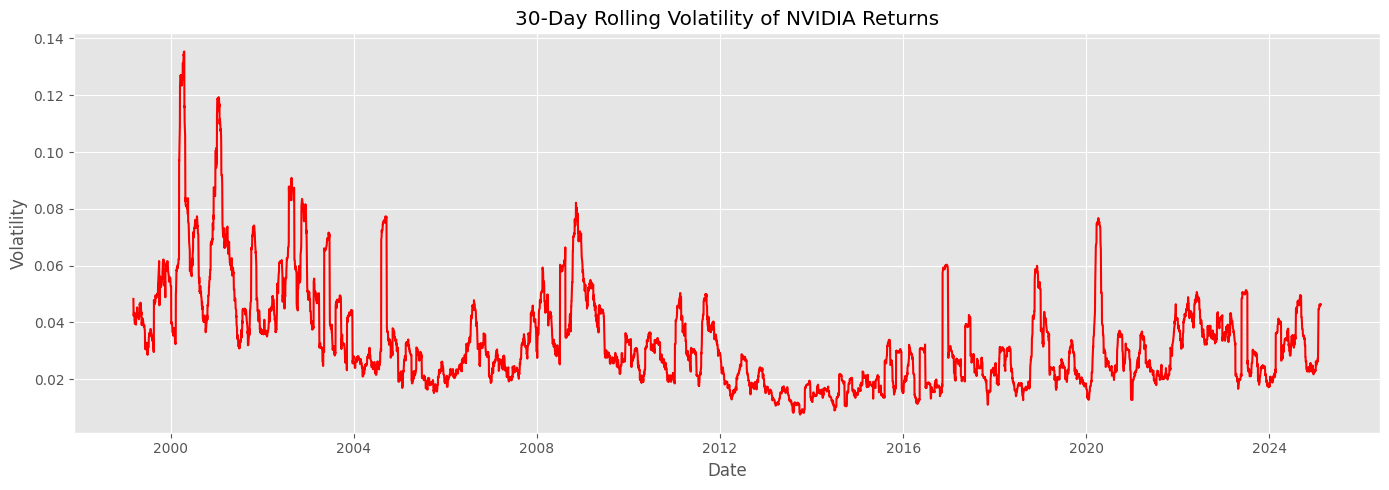

In [18]:
df['Returns'] = df['Adj Close'].pct_change()
df['Volatility'] = df['Returns'].rolling(window=30).std()  # 30-day volatility

plt.figure(figsize=(14, 5))
plt.plot(df['Volatility'], color='red')
plt.title('30-Day Rolling Volatility of NVIDIA Returns')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.tight_layout()
plt.show()


**This plot shows the 30-day rolling volatility of NVIDIA's daily returns over time. Noticeable spikes appear during major market events (e.g., early 2000s tech crash, 2008 financial crisis, COVID-19 in 2020), indicating periods of higher risk and price fluctuation. Lower flat regions suggest stable or less volatile phases. The volatility pattern helps understand how risky the stock was at different points and highlights the impact of macro events on NVIDIA's behavior.**
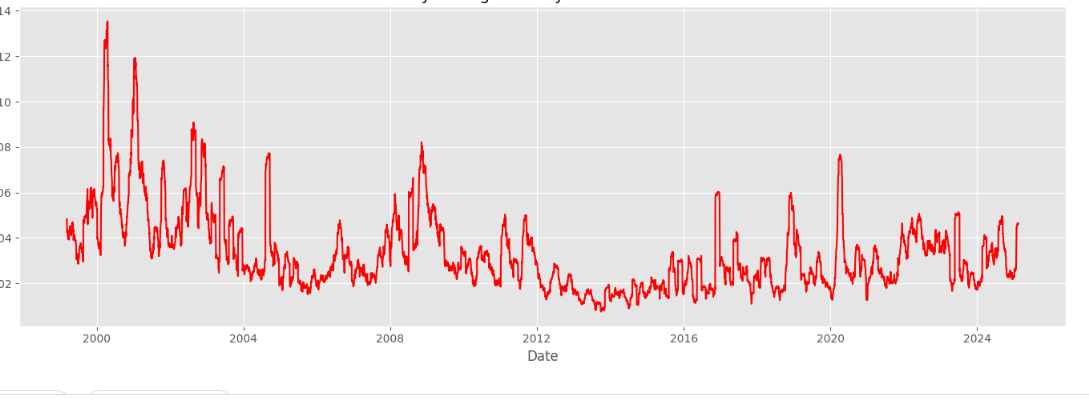

In [19]:
# Create target = next day's price
df['Target'] = df['Adj Close'].shift(-1)

# Remove last row (NaN target)
df = df.dropna()

In [20]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Target']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, lr_pred))
print("Linear Regression RMSE:", mean_squared_error(y_test, lr_pred, squared=False))

Linear Regression R2: 0.9987877585603624
Linear Regression RMSE: 0.8471635768623971


In [23]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

print("Decision Tree R2:", r2_score(y_test, dt_pred))
print("Decision Tree RMSE:", mean_squared_error(y_test, dt_pred, squared=False))

Decision Tree R2: 0.9969821731853007
Decision Tree RMSE: 1.3366566670055018


In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest R2:", r2_score(y_test, rf_pred))
print("Random Forest RMSE:", mean_squared_error(y_test, rf_pred, squared=False))

Random Forest R2: 0.9983665695113018
Random Forest RMSE: 0.9833837809924968


In [25]:

import pandas as pd

comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "R2 Score": [
        r2_score(y_test, lr_pred),
        r2_score(y_test, dt_pred),
        r2_score(y_test, rf_pred)
    ],
    "RMSE": [
        mean_squared_error(y_test, lr_pred, squared=False),
        mean_squared_error(y_test, dt_pred, squared=False),
        mean_squared_error(y_test, rf_pred, squared=False)
    ]
})

print(comparison)

               Model  R2 Score      RMSE
0  Linear Regression  0.998788  0.847164
1      Decision Tree  0.996982  1.336657
2      Random Forest  0.998367  0.983384
